# Importação das Bibliotecas
As bibliotecas que serão utilizadas `pandas` e `matplotlib` necessitam ser importadas.

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# 1 - Leitura do arquivo googleplaystore.csv
Para realizar a leitura, a biblioteca `pandas` traz a função `read_csv()` capaz de realizar a leitura.

Primeiramente, verifiquei que havia colunas sem informações. Isso pode acarretar em erros para o desenvolvimento da análise. Para isso, utilizei o método `dropna()`, removendo as linhas que possuíam colunas sem informações.

Percebi que havia um registro com rating = 19. Com base no restante do arquivo de entrada, o rating apenas vai de 0 a 5. Sendo assim, como um valor extrapola, ele deve ser eliminado.

Para remover os duplicados, basta utilizar o método `drop_duplicates()`, também da biblioteca `pandas`.

TERMINAR ISSO, VERIFICAR MAIS POSSÍVEIS INCONSISTÊNCIAS.

In [119]:
filename = 'googleplaystore.csv'

# Carregar o arquivo CSV
df = pd.read_csv(filename, sep=",", decimal=".", thousands=",")

# Preencher valores ausentes com 0
df = df.fillna(0)

# Remover avaliações inválidas
df = df[~((df['Rating'] > 5) | (df['Rating'] < 0))]

# Conversão da coluna 'Installs' para inteiro
df['Installs'] = df['Installs'].replace('[\+,]', '', regex=True).astype(int)

# Corrigir a coluna 'Category'
df['Category'] = df['Category'].str.replace('_', ' ')

# Conversão da coluna 'Price' para float
df['Price'] = df['Price'].str.replace('[\$,]', '', regex=True).astype(float)

# Conversão da coluna 'Reviews' para inteiro
df['Reviews'] = df['Reviews'].replace('[,]', '', regex=True).astype(int)

df = df.drop_duplicates(subset='App', keep='first')



# 2 - Gráfico de barras com os top 5 *apps* por número de instalação
1. Primeiramente, é necessário limpar a coluna *Installs*, a qual possui deve ser do tipo `int`, haja vista que ela possui "," e "+" em sua composição.
2. Utilizar a biblioteca matplotlib para plotar o gráfico

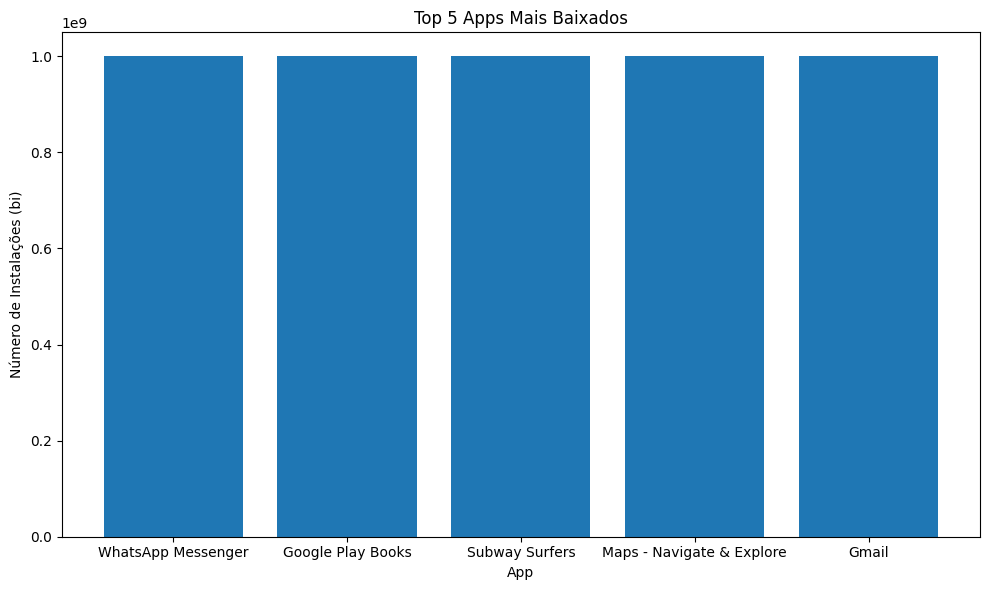

In [120]:
top_5_apps = df.sort_values(by='Installs', ascending=False).head(5)

#print(top_5_apps)

plt.figure(figsize=(10, 6))
plt.bar(top_5_apps['App'], top_5_apps['Installs'])
plt.xlabel('App')
plt.ylabel('Número de Instalações (bi)')
plt.title('Top 5 Apps Mais Baixados')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

# 3 - Gráfico de pizza com categorias de apps
1. Contar quantos registros têm.
2. Contar quantos registros de cada categoria têm.
3. Plotar gráfico.
4. Há muitas categorias, gráfico está ficando confusa => criar categoria "OUTRAS" para aquelas com menos de 3%

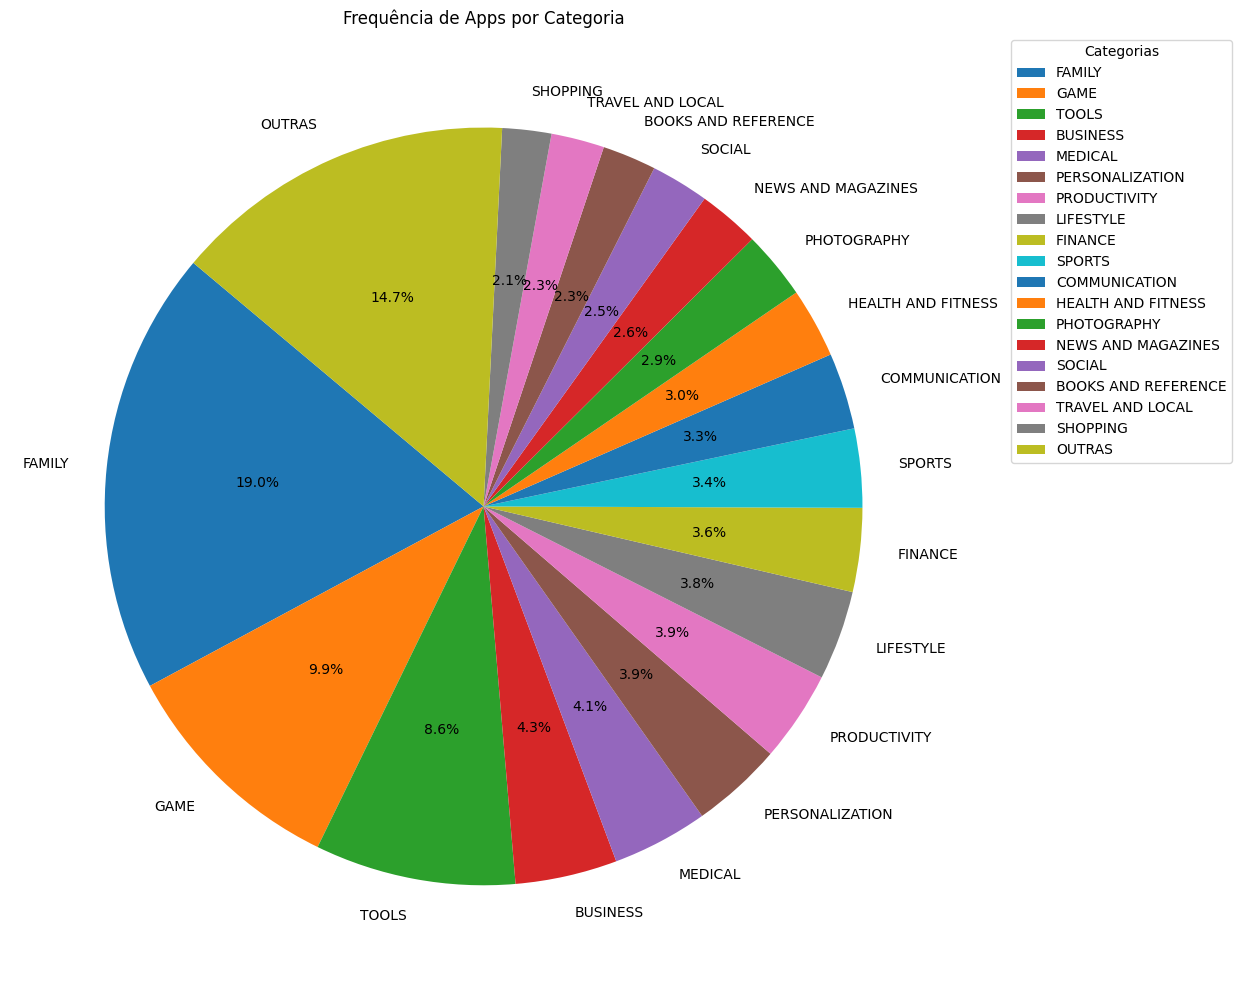

In [121]:
categoryCounts = df['Category'].value_counts()

categoryPercentages = (categoryCounts / categoryCounts.sum()) * 100

categoriesLess2 = categoryPercentages[categoryPercentages < 2].index

categoryCounts['OUTRAS'] = categoryCounts[categoriesLess2].sum()
categoryCounts = categoryCounts[~categoryCounts.index.isin(categoriesLess2)]

plt.figure(figsize=(15, 10))

colors = plt.cm.Paired(range(len(categoryCounts)))

plt.pie(categoryCounts, labels=categoryCounts.index, autopct='%1.1f%%', startangle=140)

plt.legend(title="Categorias", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Frequência de Apps por Categoria')

plt.tight_layout()

plt.show()

# 4 - App mais caro do dataset
1. Realizei testes para ver como estavam os dados. 
    a. Aqueles que eram do tipo "Free" possuíam 0 como "Price".
    b. Os outros possuíam no valor o $ antes do valor numérico. Isso tem de ser tratado.

In [122]:
mostExpensiveIndex = df['Price'].idxmax()

mostExpensiveApp = df.loc[mostExpensiveIndex]

print(f"{mostExpensiveApp['App']} - ${mostExpensiveApp['Price']}")

I'm Rich - Trump Edition - $400.0


# 5 - Quantidade de Apps classificados como 'Mature 17+'

In [123]:
count = 0
for x in df.index:
    if df.loc[x, 'Content Rating'] == 'Mature 17+':
        count += 1

print(f"Quantidade de apps 'Mature +17': {count}")

Quantidade de apps 'Mature +17': 393


# 6 - Top 10 apps por número de reviews

In [127]:
mostReviews = df.sort_values(by='Reviews', ascending=False).head(10)

count = 0
for index, row in mostReviews.iterrows():
    count += 1
    print(f"{count} - {row['App']} - {row['Reviews']}")

1 - Facebook - 78158306
2 - WhatsApp Messenger - 69119316
3 - Instagram - 66577313
4 - Messenger – Text and Video Chat for Free - 56642847
5 - Clash of Clans - 44891723
6 - Clean Master- Space Cleaner & Antivirus - 42916526
7 - Subway Surfers - 27722264
8 - YouTube - 25655305
9 - Security Master - Antivirus, VPN, AppLock, Booster - 24900999
10 - Clash Royale - 23133508


# 7 - Criação de dois cálculos sobre o dataset
**7.1 - Lista: Top 5 apps mais baixados da categoria GAME**

In [131]:
games_df = df[df['Category'] == 'GAME']

top_5_games = games_df.sort_values(by='Installs', ascending=False).head(5)

for index, row in top_5_games.iterrows():
    print(f"{row['App']} - {row['Installs']}+")

Subway Surfers - 1000000000+
Candy Crush Saga - 500000000+
Temple Run 2 - 500000000+
Pou - 500000000+
My Talking Tom - 500000000+


**7.2 - Valor: App com atualização mais recente**

In [132]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], format='%B %d, %Y')

# Encontrar o aplicativo com a atualização mais recente
most_recent_update = df.loc[df['Last Updated'].idxmax()]

# Exibir o aplicativo com a atualização mais recente
print(f"Aplicativo com a atualização mais recente:")
print(f"Nome: {most_recent_update['App']}")
print(f"Data da Última Atualização: {most_recent_update['Last Updated']}")
print(f"Data Original: {most_recent_update['Last Updated'].strftime('%B %d, %Y')}")

Aplicativo com a atualização mais recente:
Nome: Video Downloader For FB: Save FB Videos 2018
Data da Última Atualização: 2018-08-08 00:00:00
Data Original: August 08, 2018
